In [2]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, ClassicalRegister, transpile, Aer, IBMQ, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

# additional packages needed
import time

# to run on IBM computer
from qiskit.tools.monitor import job_monitor
from qiskit.providers.ibmq import least_busy
from qiskit.tools import backend_monitor

# import matplot lib
import matplotlib as plt

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# 3 Position Qubit QWR
The following code expands upon the code for the 2 position circular QRW. These QRW's have 3 entrangle position qubits which creates 8 possible position states. The circuit still only need 1 coin.

## The circuit
The code below is the circuit for this setup. This is based off the results from the larger circuit constructed in the P paper.

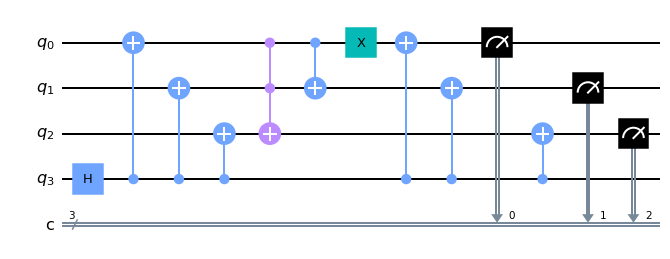

In [3]:
# code for 3 position QRW algorithm which should only need 1 ancilla qubit and 1 coin so 5 total
# we should be able to run on IBM computer
qc = QuantumCircuit(4, 3)
# label the qubits
q0 = 0
q1 = 1
q2 = 2
c = 3

# set the initial conditons as |000>

# the start of a step
def circ3(steps):
    for i in range(steps):
        qc.h(c)
        qc.cx(c, q0)
        qc.cx(c, q1)
        qc.cx(c, q2)

        qc.ccx(q0, q1, q2)
        qc.cx(q0, q1)
        qc.x(q0)
        qc.cx(c, q0)
        qc.cx(c, q1)
        qc.cx(c, q2)
        # end of step

    qc.measure([q0, q1, q2], [0, 1, 2])

    
circ3(1)
qc.draw()

## Simulator
The circuit is tested on the simulator before it is run on the IBM computer.

### Initial Condition (|000>)

In [5]:
# test this algorithm for use on the qunatum computer
qc = QuantumCircuit(4, 3)
# label the qubits
q0 = 0
q1 = 1
q2 = 2
c = 3

# the initial state listed on the histogram as |000>

# check 1 step
circ3(1)

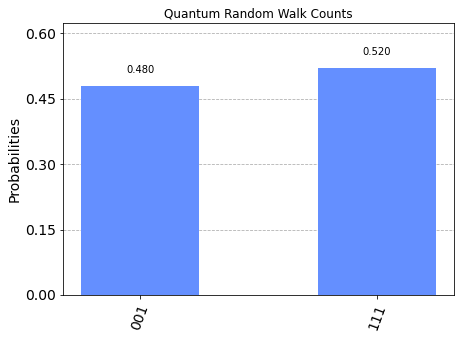

In [6]:
simulator = Aer.get_backend('aer_simulator')

qc = transpile(qc, simulator)

# Run and get counts
# set measurement repition to 100 million
result = simulator.run(qc, shots = 1024).result()
counts = result.get_counts(qc)

plot_histogram(counts, title='Quantum Random Walk Counts')

The walker starts in the |000> state and moves to the |111> state or the |001> state which is consistent with the results from the 2 position QRW.

In [7]:
# test this algorithm for use on the qunatum computer
qc = QuantumCircuit(4, 3)
# label the qubits
q0 = 0
q1 = 1
q2 = 2
c = 3

# the initial state listed on the histogram as |000>

# check 2 step
circ3(2)

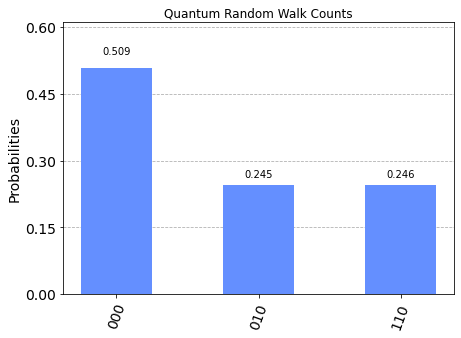

In [8]:
simulator = Aer.get_backend('aer_simulator')

qc = transpile(qc, simulator)

# Run and get counts
# set measurement repition to 100 million
result = simulator.run(qc, shots = 1024).result()
counts = result.get_counts(qc)

plot_histogram(counts, title='Quantum Random Walk Counts')

The probabilities are no longer evenly distributed. We get 50% probability that the walker returns to its initial state and around 25% probability each that the walker goes to the states |010> or |110>. This is consistent with the probabilities we would exspect classically.

In [11]:
# test this algorithm for use on the qunatum computer
qc = QuantumCircuit(4, 3)
# label the qubits
q0 = 0
q1 = 1
q2 = 2
c = 3

# the initial state listed on the histogram as |000>

# check 3 steps
circ3(3)

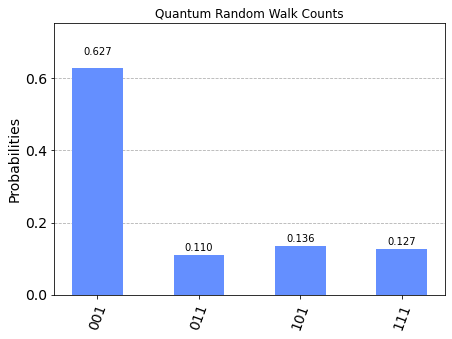

In [12]:
simulator = Aer.get_backend('aer_simulator')

qc = transpile(qc, simulator)

# Run and get counts
# set measurement repition to 100 million
result = simulator.run(qc, shots = 1024).result()
counts = result.get_counts(qc)

plot_histogram(counts, title='Quantum Random Walk Counts')

This is were the classical probability distribution breaks down. The most probably state is the |001> state. Classically this state should have the same probability as the |111> state.

In [15]:
# test this algorithm for use on the qunatum computer
qc = QuantumCircuit(4, 3)
# label the qubits
q0 = 0
q1 = 1
q2 = 2
c = 3

# the initial state listed on the histogram as |000>

# check 4 steps
circ3(4)

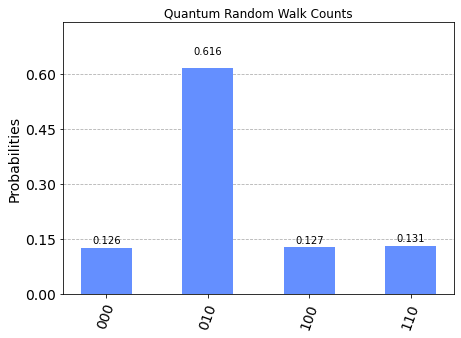

In [16]:
simulator = Aer.get_backend('aer_simulator')

qc = transpile(qc, simulator)

# Run and get counts
# set measurement repition to 100 million
result = simulator.run(qc, shots = 1024).result()
counts = result.get_counts(qc)

plot_histogram(counts, title='Quantum Random Walk Counts')

For 4 steps, the most probably state is hte |010> state which is another breakdown of the clasical distribution.

In [25]:
# test this algorithm for use on the qunatum computer
qc = QuantumCircuit(4, 3)
# label the qubits
q0 = 0
q1 = 1
q2 = 2
c = 3

# the initial state listed on the histogram as |000>

# check 5 steps
circ3(5)

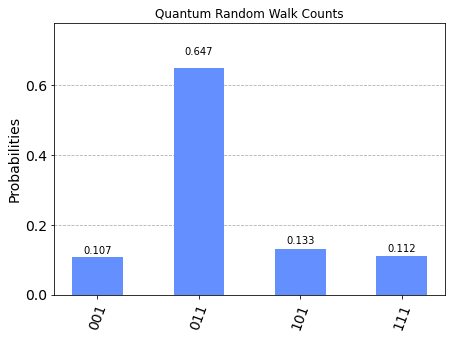

In [26]:
simulator = Aer.get_backend('aer_simulator')

qc = transpile(qc, simulator)

# Run and get counts
# set measurement repition to 100 million
result = simulator.run(qc, shots = 1024).result()
counts = result.get_counts(qc)

plot_histogram(counts, title='Quantum Random Walk Counts')

It appears that the most probable state is always the one that requires all steps except one to be to the "right."

### Initial Condition (|110>)
Look at a different initial condition to see if this pattern in the probabilities holds.

In [33]:
# test this algorithm for use on the qunatum computer
qc = QuantumCircuit(4, 3)
# label the qubits
q0 = 0
q1 = 1
q2 = 2
c = 3

# the initial state listed on the histogram as |110>
qc.x(q1)
qc.x(q2)

# check 1 step
circ3(1)

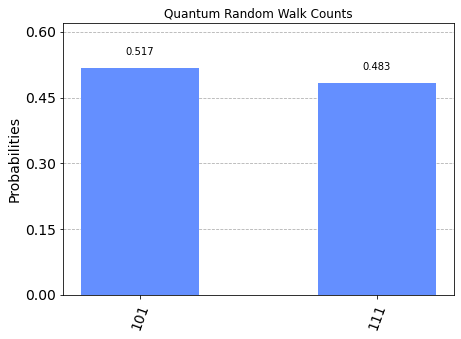

In [34]:
simulator = Aer.get_backend('aer_simulator')

qc = transpile(qc, simulator)

# Run and get counts
# set measurement repition to 100 million
result = simulator.run(qc, shots = 1024).result()
counts = result.get_counts(qc)

plot_histogram(counts, title='Quantum Random Walk Counts')

## IBM computer results

This is the expected results as the initial state was |110>.

In [35]:
# test this algorithm for use on the qunatum computer
qc = QuantumCircuit(4, 3)
# label the qubits
q0 = 0
q1 = 1
q2 = 2
c = 3

# the initial state listed on the histogram as |110>
qc.x(q1)
qc.x(q2)

circ3(2)

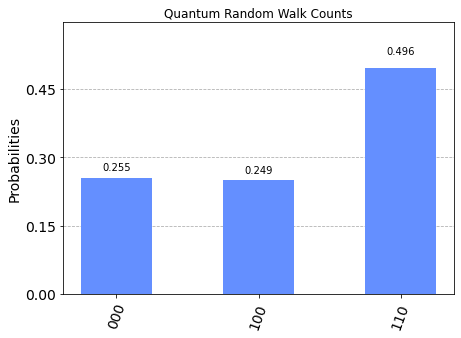

In [36]:
simulator = Aer.get_backend('aer_simulator')

qc = transpile(qc, simulator)

# Run and get counts
# set measurement repition to 100 million
result = simulator.run(qc, shots = 1024).result()
counts = result.get_counts(qc)

plot_histogram(counts, title='Quantum Random Walk Counts')

We begin to see the same probability pattern forming. The most probably is all but one step to the right.

In [37]:
# test this algorithm for use on the qunatum computer
qc = QuantumCircuit(4, 3)
# label the qubits
q0 = 0
q1 = 1
q2 = 2
c = 3

# the initial state listed on the histogram as |110>
qc.x(q1)
qc.x(q2)

circ3(3)

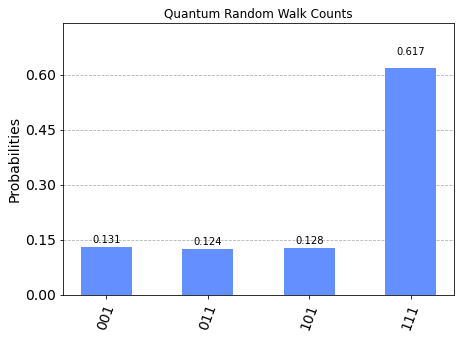

In [38]:
simulator = Aer.get_backend('aer_simulator')

qc = transpile(qc, simulator)

# Run and get counts
# set measurement repition to 100 million
result = simulator.run(qc, shots = 1024).result()
counts = result.get_counts(qc)

plot_histogram(counts, title='Quantum Random Walk Counts')

## IBM computer results

Again the same pattern emerges.

## IBM Hardware
We used initial state |000>. We ran 1 step on the IBM hardware. The errors were so high that the prohibited states were indistinguishable from the allowed states.

In [39]:
# test this algorithm for use on the qunatum computer
qc = QuantumCircuit(4, 3)
# label the qubits
q0 = 0
q1 = 1
q2 = 2
c = 3

# the initial state is |000>

circ3(1)

In [40]:
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends(simulator=False)

[<IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [41]:
# max qubits we have is 5 build 5 qubits QRW
candidates = provider.backends(filters=lambda x: x.configuration().n_qubits >= 5
                                   and not x.configuration().simulator)
candidates

[<IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>]

Job Status: job has successfully run


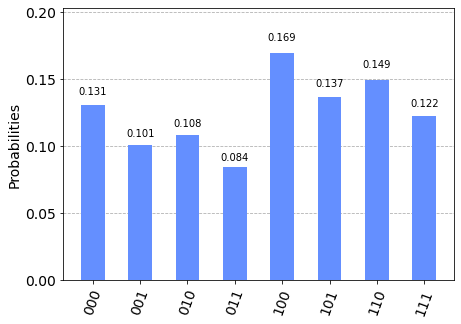

In [42]:
# run on the quantum computer
backend = backend = least_busy(candidates)
job = execute(qc, backend, shots=2000)
job_monitor(job)
device_result = job.result()
plot_histogram(job.result().get_counts())

In [ ]:
backend_monitor(backend)

When the circuit is run on the IBM computer the errors are so high that the allowed states cannot be distinguished from the allowed states. This is likely due to there being more entangled qubits.